# Finding Contours

In this notebook, I will try to get full contour of each closed boundary in the paper target and create a series of cropped images based on these boundaries.

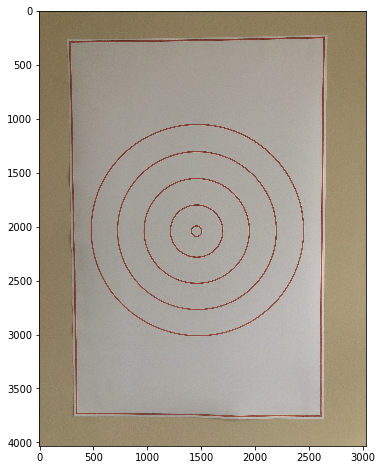

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Set the default figure size
plt.rcParams['figure.figsize'] = [16,8]

# read in image
image = cv2.imread('images/template.jpeg')

# change color to RGB fro BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show image
plt.imshow(image)

### Produce binary image for finding contours

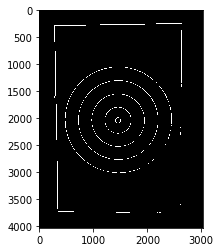

In [3]:
# convert to gray
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# blur
gray_blurred = cv2.GaussianBlur(gray, (5,5), 4)

# create a binary threshold image
retval, binary = cv2.threshold(gray_blurred, 100, 255, cv2.THRESH_BINARY_INV)

# show image
plt.imshow(binary, cmap='gray')

### Find and Draw Contours

Detected 342 contours


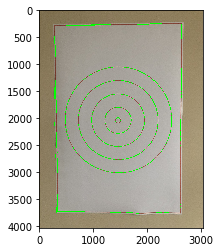

In [4]:
# find contours from shresholded, binary image
retval, contours, hierarchy = cv2.findContours(binary,
                                               cv2.RETR_TREE,
                                               cv2.CHAIN_APPROX_SIMPLE)

# draw all contours on a copy image
contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image, contours, -1,
                                  (0,255,0), 3)

# show image
plt.imshow(contours_image)
print('Detected {} contours'.format(len(contours)))

In [5]:
np.array(contours).shape

(342,)

### Crop Image Around Contour

In [6]:
# returns a new, cropped version of the original image
def target_crop(image, selected_contour):
    '''
    INPUT
    ------
    image : original image
    selected contour : contour that will be used for cropping
    
    RETURN
    ------
    cropped_image : cropped image around given contour
    '''
    
    # detect bounding rectangle around contour
    x,y,w,h = cv2.boundingRect(selected_contour)
    
    # crop image using bounding rectangle
    cropped_image = np.copy(image)
    cropped_image = cropped_image[y : y+h, x : x+w]
    
    return cropped_image

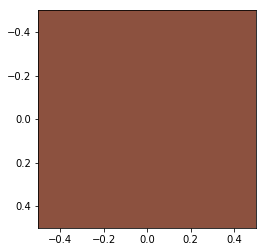

In [7]:
# select contour
selected_contour = contours[10]

# call traget crop and show image
cropped_image = target_crop(image, selected_contour)
plt.imshow(cropped_image)

Too many contours of not what I want get detected.

<p style="font-family: Arial; font-size:3em;color:purple; font-style:bold"><br>
My Solution</p><br>

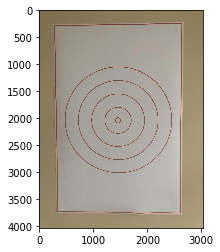

In [12]:
# First import OpenCV, NumPY and MatPlotLib as we will use these libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load a color image
img = cv2.imread("images/template.jpeg")

# h is the Parameter regulating filter strength for luminance component. 
# Bigger h value perfectly removes noise but also removes image details, 
# smaller h value preserves details but also preserves some noise
hColor = h = 20
    
# Default values
templateWindowSize = 7
searchWindowSize = 21

#Image denoising by 'cv2.fastNlMeansDenoisingColored'
blur = cv2.fastNlMeansDenoisingColored(img, None,h,hColor,templateWindowSize,searchWindowSize)
    
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))

### Edge Detection
Instead of using a gradient, you could use an edge detection such as Sobol, Laplacian and Canny here in combination with adjusting the image denoising step above. 

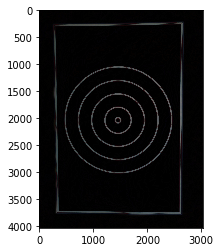

In [20]:
# Apply a morphological gradient (dilate the image, erode the image, and take the difference
elKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13,13))

# Use openCV's morphologyEx to generate a gradient using the kernel above
gradient = cv2.morphologyEx(blur, cv2.MORPH_GRADIENT, elKernel)

plt.imshow(cv2.cvtColor(gradient, cv2.COLOR_BGR2RGB))

### OTSU Thresholding
When converting from a grayscale image to a black and white image, selecting a good threshold value can be a time-consuming and manual process.  There are a number of automatic thresholding techniques available - and Otsu's method thresholding is one of the better known techniques.

Conceptually simple, and relatively low cost computationally, Otsu's threshold iterate through all the possible threshold values to find the threshold value where the sum of foreground and background spreads is at its minimum. 

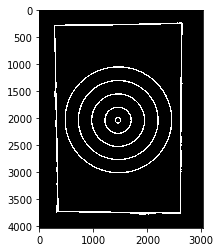

In [21]:
# Convert gradient to grayscale
gradient = cv2.cvtColor(gradient, cv2.COLOR_BGR2GRAY)

#  Generate a matrix called otsu using OpenCV's threshold() function.  Use
otsu = cv2.threshold(gradient, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
       
# Apply a closing operation - we're using a large kernel here. By all means adjust the size of this kernel
# and observe the effects
closingKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (33,33))
close = cv2.morphologyEx(otsu, cv2.MORPH_CLOSE, closingKernel)
plt.imshow(close, cmap='gray')

### Find and Draw Contours

Detected 12 contours


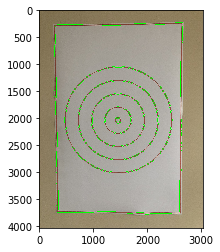

In [22]:
# find contours from shresholded, binary image
retval, contours, hierarchy = cv2.findContours(close,
                                               cv2.RETR_TREE,
                                               cv2.CHAIN_APPROX_SIMPLE)

# draw all contours on a copy image
contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image, contours, -1,
                                  (0,255,0), 3)

# show image
plt.imshow(contours_image)
print('Detected {} contours'.format(len(contours)))

### Crop Image Around Contour

In [23]:
# returns a new, cropped version of the original image
def target_crop(image, selected_contour):
    '''
    INPUT
    ------
    image : original image
    selected contour : contour that will be used for cropping
    
    RETURN
    ------
    cropped_image : cropped image around given contour
    '''
    
    # detect bounding rectangle around contour
    x,y,w,h = cv2.boundingRect(selected_contour)
    
    # crop image using bounding rectangle
    cropped_image = np.copy(image)
    cropped_image = cropped_image[y : y+h, x : x+w]
    
    return cropped_image

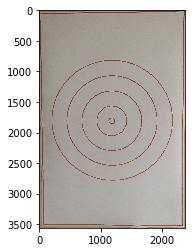

In [28]:
# Sort the candidates by size, and just keep the largest one
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1]
selected_contour = contours[0]

# call traget crop and show image
cropped_image = target_crop(image, selected_contour)
plt.imshow(cropped_image)